# Example usage

To use `mds_2025_helper_functions` in a project:

## Imports

In [1]:
from mds_2025_helper_functions.scores import compare_model_scores
from sklearn.datasets import load_iris, load_diabetes
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

## Compare CV scores of multiple models

`compare_model_scores()` is a wrapper function for scikit learn's `cross_validate()` that allows you to compare the mean cross validation scores across multiple models. The only difference in calling this function compared to `cross_validate()` is that it takes multiple model objects rather than one.

Note: The default scoring metric is R² for regression and accuracy for classification tasks.

### Basic usage
To demonstrate, let's load a sample dataset and instantiate our model classes. We'll be using the Diabetes dataset from scikit learn. The Diabetes dataset contains 10 baseline variables and progression of diabetes after one year. To learn more about this dataset, visit its documentation: https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

In [2]:
X, y = load_diabetes(return_X_y=True)
dummy_regressor = DummyRegressor()
tree_regressor = DecisionTreeRegressor()

This is already enough for our basic use of the function. Simply pass these to `compare_model_scores()`.

Note: The default scoring metric is R² for regression tasks. Negative R² scores indicate the model performs worse than predicting the mean value.

In [3]:
compare_model_scores(dummy_regressor, tree_regressor, X=X, y=y)

,fit_time,score_time,test_score
model,,,
DummyRegressor,0.000514,0.000704,-0.027506
DecisionTreeRegressor,0.003401,0.000402,-0.140715


As you can see, the function returns a dataframe with the performance statistics for each model. The model names are used for the index.

### Using `cross_validate()` arguments
Like `cross_validate`, the function also works for classification models, and you can pass arguments to reutrn training scores, or use different scoring metrics.

For classification, we'll be using the Iris dataset from scikit learn. The Iris dataset contains measurements of iris flowers with 3 different species. To learn more about this dataset, visit its documentation: https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset

In [4]:
X, y = load_iris(return_X_y=True)
dummy_classifier = DummyClassifier()
tree_classifier = DecisionTreeClassifier()
scoring_metric = "f1_macro"                 # A scoring metric for multiclass classification

compare_model_scores(dummy_classifier, tree_classifier, X=X, y=y, return_train_scores=True, scoring=scoring_metric)

,fit_time,score_time,test_score,train_score
model,,,,
DummyClassifier,0.000399,0.001720,0.166667,0.166667
DecisionTreeClassifier,0.001004,0.001245,0.966583,1.000000


### Passing multiple models of the same type

When you compare several models of the same type, each model is be given an index in the output table based on the order it was passed to `compare_model_scores()`.

In [5]:
second_tree_classifier = DecisionTreeClassifier(max_depth=3)

compare_model_scores(tree_classifier, second_tree_classifier, X=X, y=y)

,fit_time,score_time,test_score
model,,,
DecisionTreeClassifier,0.000494,0.000943,0.953333
DecisionTreeClassifier_2,0.000751,0.000750,0.973333


## Perform exploratory data analysis (EDA)

The `perform_eda` function provides a comprehensive exploratory data analysis (EDA) framework for any dataset. It combines summary statistics and feature visualizations, making it a valuable tool for understanding and exploring data.

## Function Signature

```python
perform_eda(dataframe, rows=5, cols=2)
```

## Parameters

| Parameter  | Type           | Default  | Description                                       |
|------------|----------------|----------|---------------------------------------------------|
| dataframe  | `pd.DataFrame` | Required | Input dataset for EDA. Must be a Pandas DataFrame. |
| rows       | `int`          | `5`      | Number of rows in the grid layout for visualizations. |
| cols       | `int`          | `2`      | Number of columns in the grid layout for visualizations. |

## Returns

This function does not return a value. Instead, it:

1. Prints a summary of the dataset.
2. Generates plots for missing values, correlations, and feature distributions.
3. Outputs potential outliers and scatterplots for numeric features.

## Key Features

1. **Dataset Overview**
   - Prints dataset structure, number of rows/columns, and column data types.

2. **Basic Statistics**
   - Descriptive statistics for all numeric and categorical columns.
   - Handles datasets with mixed data types.

3. **Missing Values Report**
   - Highlights columns with missing values.
   - Displays a heatmap of missing data if applicable.

4. **Correlation Heatmap**
   - For numeric columns, it computes and visualizes pairwise correlations.

5. **Dynamic Feature Visualizations**
   - Automatically generates appropriate visualizations:
     - Histograms and KDE plots for numeric features.
     - Count plots for categorical features.
     - Line plots for datetime features.

6. **Scatterplots**
   - Scatterplots for numeric feature pairs (if more than one numeric column exists).

7. **Outliers Detection**
   - Identifies potential outliers using the Interquartile Range (IQR) method.

---

## Example Usage

### Dataset


In [6]:
import pandas as pd
import numpy as np

np.random.seed(42)  

data = {
    'age': np.random.randint(20, 60, size=50),  # Random ages between 20 and 60
    'salary': np.random.randint(30000, 120000, size=50),  # Salaries between 30k and 120k
    'department': np.random.choice(['HR', 'Finance', 'IT', 'Marketing', 'Operations'], size=50),  # Random departments
    'joining_date': pd.to_datetime(np.random.choice(pd.date_range('2010-01-01', '2022-01-01'), size=50)),  # Random dates
    'experience': np.random.randint(1, 30, size=50),  # Years of experience between 1 and 30
    'performance_score': np.random.uniform(1, 5, size=50),  # Performance score between 1 and 5
    'bonus': np.random.choice([True, False], size=50, p=[0.3, 0.7])  # Random True/False for bonuses
}

df = pd.DataFrame(data)

### Run perform_eda

===== Dataset Overview =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   age                50 non-null     int32         
 1   salary             50 non-null     int32         
 2   department         50 non-null     object        
 3   joining_date       50 non-null     datetime64[ns]
 4   experience         50 non-null     int32         
 5   performance_score  50 non-null     float64       
 6   bonus              50 non-null     bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int32(3), object(1)
memory usage: 1.9+ KB
None

===== Basic Statistics =====
                  count unique         top freq                 mean  \
age                50.0    NaN         NaN  NaN                39.04   
salary             50.0    NaN         NaN  NaN             77464.08   
department           50      5  O

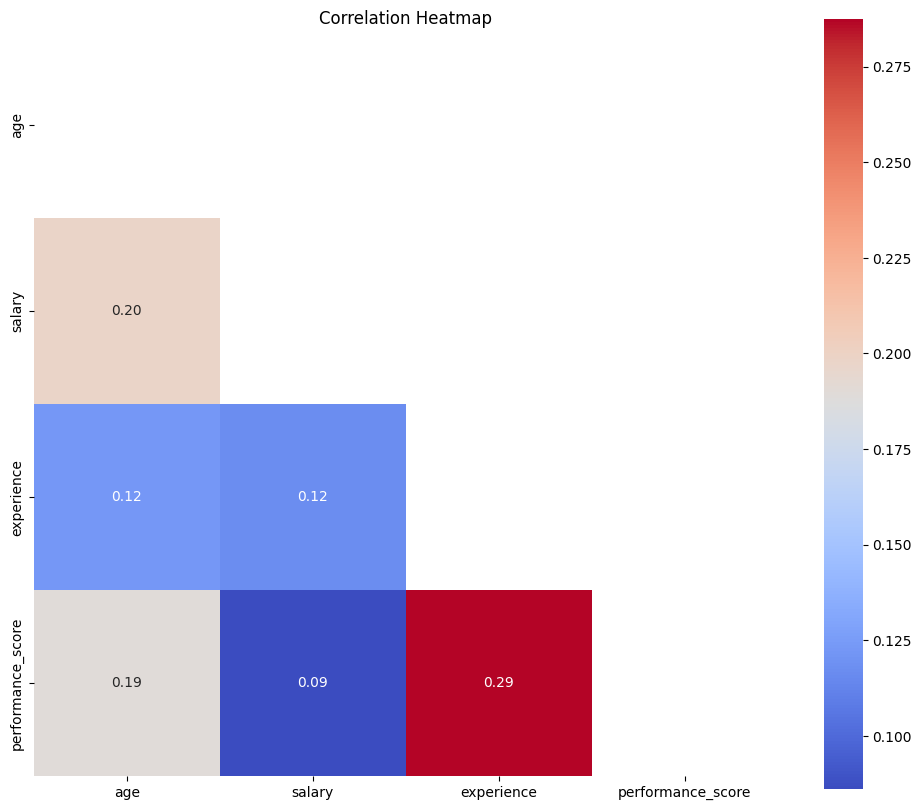


===== Feature Visualizations =====


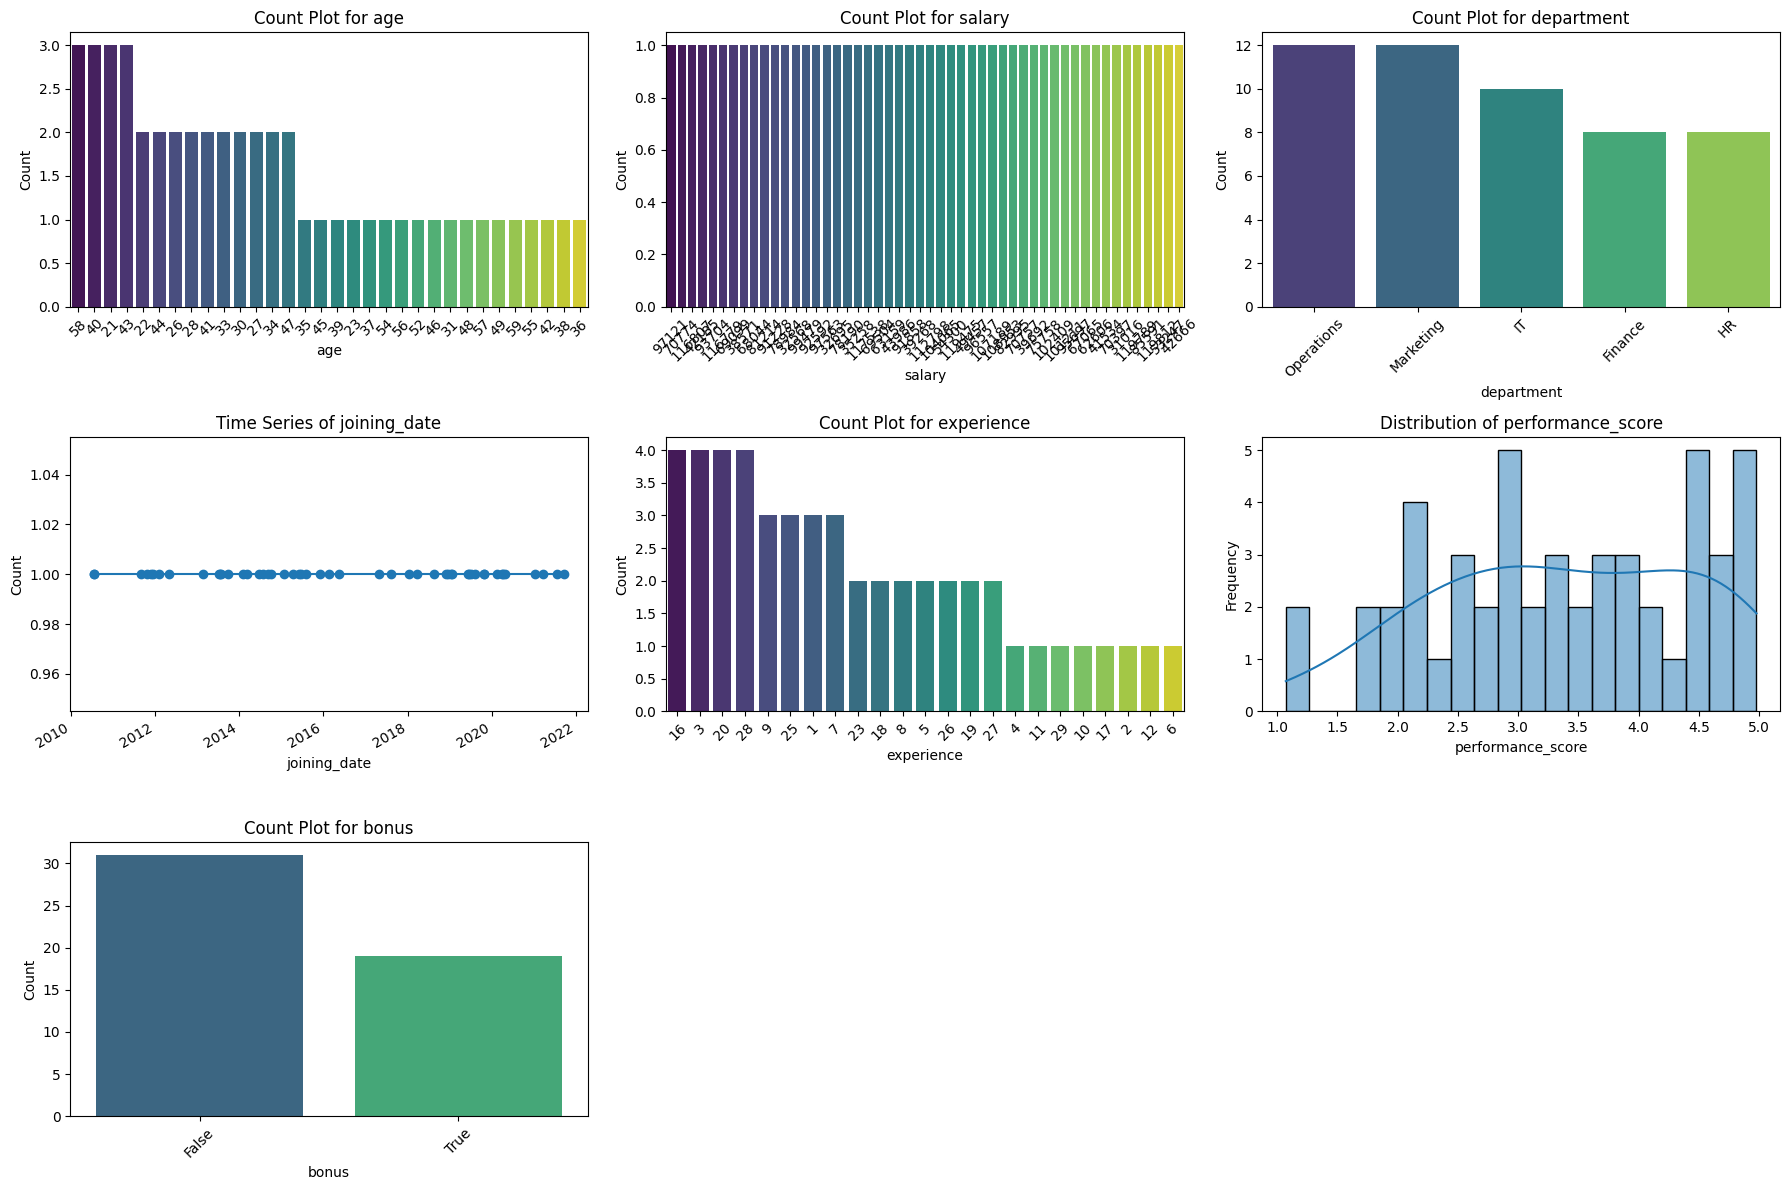


===== Scatterplots for Numeric Features =====


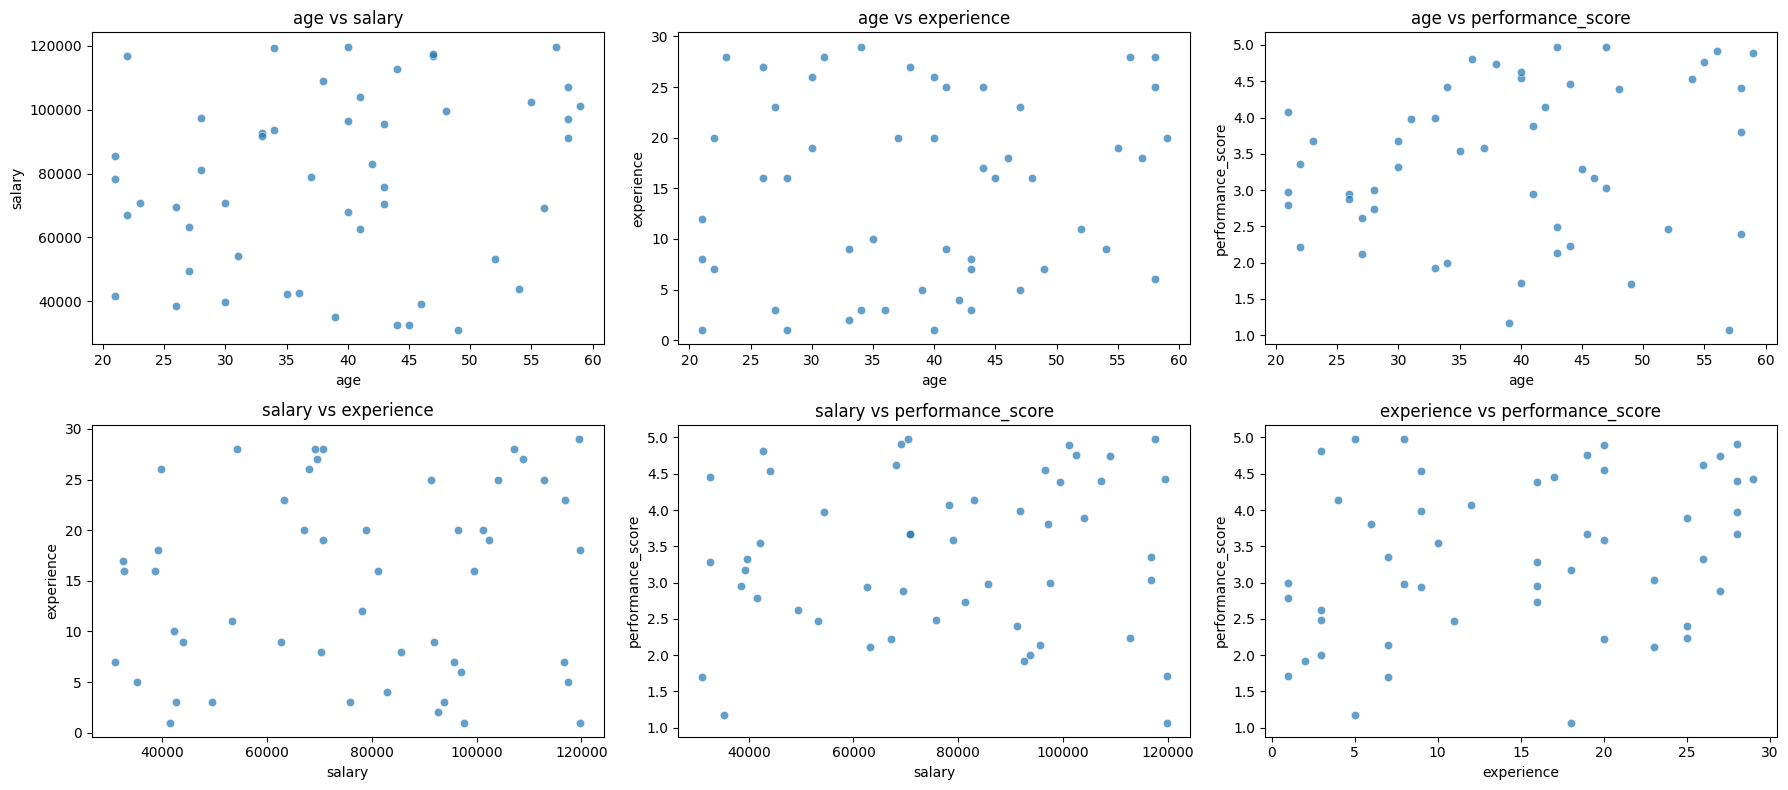


===== Outliers Report =====
age: 0 potential outliers
salary: 0 potential outliers
experience: 0 potential outliers
performance_score: 0 potential outliers


In [7]:
from mds_2025_helper_functions.eda import perform_eda

perform_eda(df, rows=3, cols=3)

## Summarize a dataset

In [8]:
# Karlygash

## Visualize hypothesis tests

We'll continue to demonstrate the functionality of htv() using the toy data created in perform_eda(),

In [9]:
from mds_2025_helper_functions.htv import htv
df.head()


,age,salary,department,joining_date,experience,performance_score,bonus
0,58,97121,Operations,2013-09-25,6,3.801431,False
1,48,99479,Finance,2015-06-05,16,4.386645,False
2,34,119475,Finance,2014-07-22,29,4.425297,False
3,27,49457,HR,2014-03-10,3,2.618033,False
4,40,96557,Marketing,2015-08-01,20,4.551080,True


Based on our observations of the data, we can set up our hypothesis testing question as Are the average salaries of employees in the research department (e.g., HR) significantly higher than the average salaries of employees in all departments? The hypothesis test will be set as one-tail z-test with significant level a=0.05  

__Hypothesis (H0): Average salary of departmental HR ≤ average salary of all departments__

__Alternative hypothesis (H1): Average salary of departmental HR > average salary of all departments__


(77464.08, 67306.75, 27874.066306200268, 8)

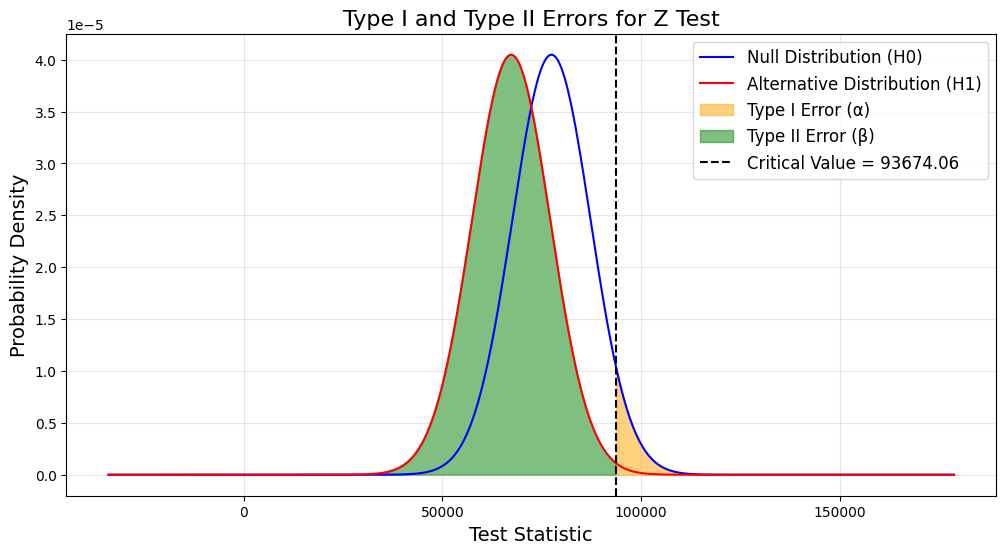

In [10]:
# Extracting relevant data for hypothesis testing
all_salary = df['salary']  # All department salaries
hr_salary = df[df['department'] == 'HR']['salary']  # Salaries for HR department

# Calculating parameters
mu0 = all_salary.mean()  # Overall mean salary
mu1 = hr_salary.mean()  # Mean salary for HR
sigma = all_salary.std()  # Using overall standard deviation as an approximation
sample_size = len(hr_salary)  # Sample size for HR

# Define test parameters
test_params = {
    "mu0": mu0,
    "mu1": mu1,
    "sigma": sigma,
    "sample_size": sample_size
}

# Visualize hypothesis testing using the htv function
fig, ax = htv(test_output=test_params, test_type="z", alpha=0.05, tail="one-tailed")

(mu0, mu1, sigma, sample_size)  # Display the calculated values


We can clearly see the type1 error and type2 error from the above figure, which provides image help to those who can't understand the hypothesis test quickly to make them understand.